In [1]:
!pip install opencv-python-headless

In [12]:
image_path = "/content/original-4945528-4.jpg"

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-32-40fe41243f90>:41: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


Detected Rectangle with surface area: 5225 square pixels
Detected Rectangle with surface area: 2975 square pixels
Detected Rectangle with surface area: 12408 square pixels
Detected Rectangle with surface area: 1053 square pixels
Detected Rectangle with surface area: 3816 square pixels
Detected Rectangle with surface area: 3441 square pixels
Detected Rectangle with surface area: 5192 square pixels


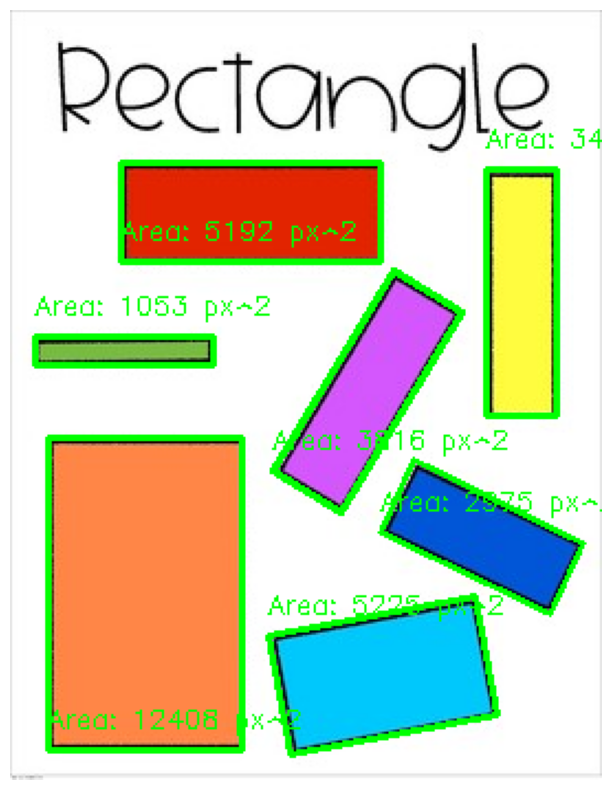

All detected rectangle surface areas: [5225, 2975, 12408, 1053, 3816, 3441, 5192]


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_calculate_area(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at path: {image_path}")
        return
    # Gray scaling the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours, the retrival mode is set to external
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No object detected.")
        return

    # Initialize a list to hold surface areas of detected rectangles
    rectangle_areas = []

    # Iterate over each contour
    for contour in contours:
        # Approximate the contour to a polygon
        epsilon = 0.035 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Ensure the contour is closed and has enough vertices to be a rectangle
        if len(approx) == 4:
            # Use cv2.minAreaRect to get the rotated bounding box
            rect = cv2.minAreaRect(contour)
            box = cv2.boxPoints(rect)
            box = np.int0(box)

            # Calculate the width and height of the bounding box
            width = int(rect[1][0])
            height = int(rect[1][1])

            # Ensure the rectangle is reasonably large to avoid noise
            surface_area = width * height
            if surface_area > 50:  # Adjust this threshold as needed
                rectangle_areas.append(surface_area)
                print(f"Detected Rectangle with surface area: {surface_area} square pixels")
                cv2.drawContours(image, [box], 0, (0, 255, 0), 2)
                label = f"Area: {surface_area} px^2"
                cv2.putText(image, label, (box[0][0], box[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

    # Convert image to RGB format for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # Print all detected rectangle areas
    if rectangle_areas:
        print("All detected rectangle surface areas:", rectangle_areas)

# Example usage with the uploaded image
image_path = '/content/original-4945528-4.jpg'
detect_and_calculate_area(image_path)


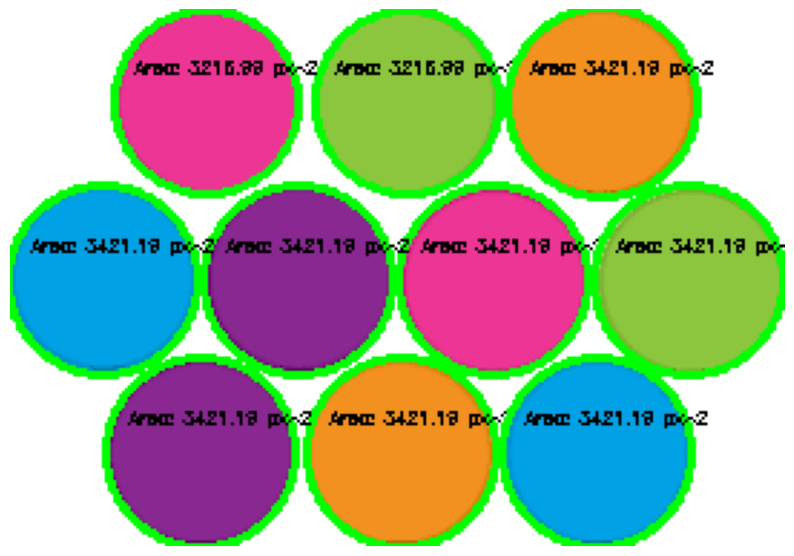

All detected circle areas:
Circle 1: 3421.19 px^2
Circle 2: 3421.19 px^2
Circle 3: 3216.99 px^2
Circle 4: 3421.19 px^2
Circle 5: 3421.19 px^2
Circle 6: 3421.19 px^2
Circle 7: 3216.99 px^2
Circle 8: 3421.19 px^2
Circle 9: 3421.19 px^2
Circle 10: 3421.19 px^2


In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_and_calculate_area(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image at path: {image_path}")
        return

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Hough Circle Transform to detect circles
    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                               param1=50, param2=30, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")

        # Initialize a list to hold circle areas
        circle_areas = []

        for (x, y, r) in circles:
            # Draw the circle on the image
            cv2.circle(image, (x, y), r, (0, 255, 0), 2)

            # Calculate area of the circle
            area = np.pi * r * r
            circle_areas.append(area)

            # Display area near the circle
            cv2.putText(image, f'Area: {area:.2f} px^2', (x - 25, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.2, (0,0,0), 1)

        # Convert image to RGB format for displaying with matplotlib
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10, 10))
        plt.imshow(image_rgb)
        plt.axis('off')
        plt.show()

        # Print all detected circle areas
        print("All detected circle areas:")
        for i, area in enumerate(circle_areas, start=1):
            print(f"Circle {i}: {area:.2f} px^2")

    else:
        print("No circles detected.")

# Example usage with the image path
image_path = '/content/download.png'
detect_and_calculate_area(image_path)
